# Clustering

In [28]:
import pandas as pd
import glob

# Concatenating all datasets (one dataset per month 2017) to one
##df_bb = pd.concat(map(pd.read_csv, glob.glob("./backblaze_ST4000DM000/*.csv")))
df = pd.concat(map(pd.read_csv, glob.glob("backblaze2019/2019-01*.csv")))
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape

(3314967, 129)

## Preparing data

In [30]:
df1 = df[df['model'] == "ST12000NM0007"]
df1.shape

(975204, 129)

In [31]:
df1 = df1[df1.serial_number.duplicated(keep=False)]

In [32]:
df1['serial_number'].value_counts()

ZJV0XJQ4    31
ZJV03DKK    31
ZJV03DK0    31
ZCH078R2    31
ZCH06ME2    31
            ..
ZJV03VB2     3
ZJV0HYW9     3
ZCH07RLC     2
ZCH03BDT     2
ZCH0DW9D     2
Name: serial_number, Length: 32401, dtype: int64

In [33]:
df1.select_dtypes(include='object')

,date,serial_number,model
1,2019-01-01,ZJV0XJQ4,ST12000NM0007
2,2019-01-01,ZJV0XJQ3,ST12000NM0007
3,2019-01-01,ZJV0XJQ0,ST12000NM0007
6,2019-01-01,ZJV02XWG,ST12000NM0007
7,2019-01-01,ZJV1CSVX,ST12000NM0007
...,...,...,...
106046,2019-01-31,ZCH068KT,ST12000NM0007
106051,2019-01-31,ZCH068KY,ST12000NM0007
106056,2019-01-31,ZCH0CJ40,ST12000NM0007
106071,2019-01-31,ZJV1CSVC,ST12000NM0007


In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df1['serial_number'])
le.classes_
df1['serial_number'] = le.transform(df1['serial_number'])

In [35]:
le.fit(df1['date'])
le.classes_
df1['date'] = le.transform(df1['date'])

In [36]:
df1 = df1.drop(['model'], axis=1)

In [37]:
# drop all columns which have only NAN values
df1 = df1.dropna(axis=1, how='all')
df1.shape

(975198, 48)

In [38]:
df1 = df1.dropna()
df1.shape

(975075, 48)

In [39]:
y1 = df1['failure']
X = df1.drop('failure',axis=1)

In [40]:
X['serial_number'].value_counts()

25567    31
16054    31
9729     31
13166    31
3722     31
         ..
9175      3
29867     3
17077     2
199       2
7041      2
Name: serial_number, Length: 32401, dtype: int64

In [41]:
y1.value_counts()

0    975024
1        51
Name: failure, dtype: int64

## PCA 

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.0,0.789105,0.0,0.527778,0.766432,0.904762,0.0,0.0,0.002326,1.0,...,0.0,0.0,0.0,0.0,0.0,0.246289,0.0,0.159299,0.0,0.130536
1,0.0,0.789074,0.0,0.250000,0.080278,0.952381,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.054640,0.0,0.033721,0.0,0.004495
2,0.0,0.789043,0.0,0.472222,0.560922,0.666667,0.0,0.0,0.011628,1.0,...,0.0,0.0,0.0,0.0,0.0,0.339749,0.0,0.184885,0.0,0.237902
3,0.0,0.624475,0.0,0.472222,0.477282,0.619048,0.0,0.0,0.011628,1.0,...,0.0,0.0,0.0,0.0,0.0,0.449519,0.0,0.193383,0.0,0.278617
4,0.0,0.879599,0.0,0.500000,0.702183,0.904762,0.0,0.0,0.002326,1.0,...,0.0,0.0,0.0,0.0,0.0,0.322052,0.0,0.195128,0.0,0.249017


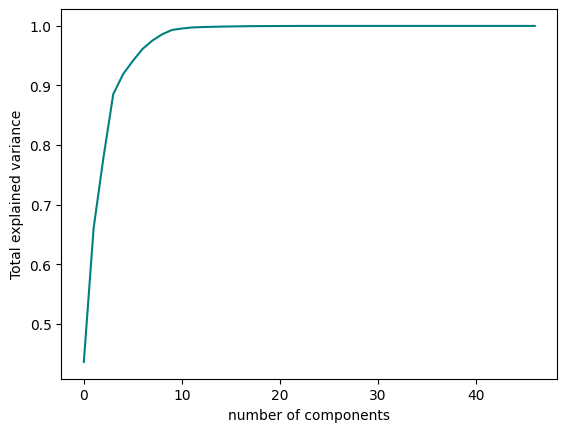

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('Total explained variance'); 

In [44]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

4

In [45]:
pca = PCA(0.95).fit(df_scaled)
pca.n_components_ 

7

## Визуализация кластеров полученных снижением размерности с помощью PCA

In [46]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

In [47]:
df_pca = pd.DataFrame(X_pca, columns =['Component 1', 'Component 2'])
df_pca.head(2)

,Component 1,Component 2
0,0.611726,-0.288754
1,0.858580,0.750278


In [48]:
y1.reset_index(inplace=True, drop=True)
y1

0         0
1         0
2         0
3         0
4         0
         ..
975070    0
975071    0
975072    0
975073    0
975074    0
Name: failure, Length: 975075, dtype: int64

In [49]:
df_pca = pd.concat([df_pca, y1], axis=1)
df_pca.head()

,Component 1,Component 2,failure
0,0.611726,-0.288754,0
1,0.858580,0.750278,0
2,0.481724,-0.000869,0
3,0.204693,0.081603,0
4,0.564453,-0.194086,0


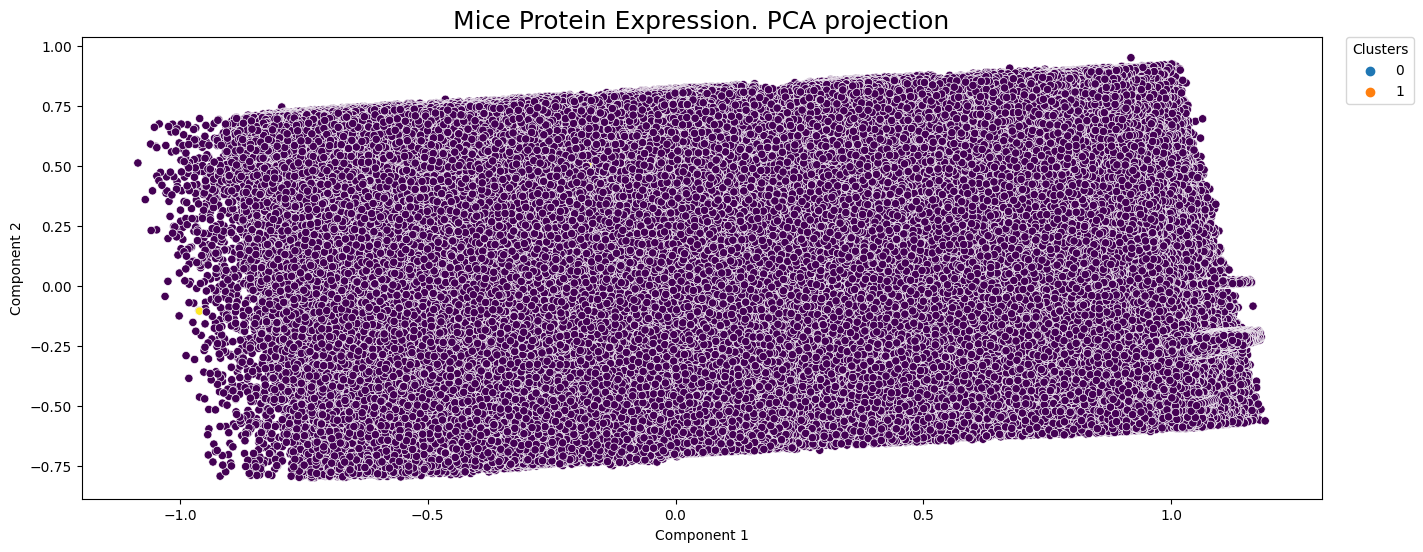

In [50]:
plt.figure(figsize=(16, 6)) 

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca, c=y1, hue = 'failure')
plt.title('Mice Protein Expression. PCA projection', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()


## Подбор гиперпараметров

In [51]:
from sklearn.decomposition import PCA

components = [4, 7]
X_reduced = []
for reduced_dims in components:
    pca = PCA(n_components=reduced_dims)
    X_transformed = pca.fit_transform(df_scaled)
    X_reduced.append(X_transformed)

In [52]:
import pathlib
import itertools
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

RESULTS_PATH = pathlib.Path("cv_results.csv")


def train_and_store(estimator, param_grid: dict | None = None):
    param_grid = param_grid if param_grid is not None else {}
    param_combs = [
        dict(params) for params in
        itertools.product(
            *([(name, v) for v in vs] for (name, vs) in param_grid.items())
        )
    ]

    results = []
    for X in X_reduced:
        best_ari = None
        best_ami = None
        best_fmi = None

        for params in param_combs:
            cloned_estimator = clone(estimator).set_params(**params)

            start_t = time.perf_counter()
            pred = cloned_estimator.fit_predict(X)
            fit_predict_time_s = (time.perf_counter() - start_t)

            ari = adjusted_rand_score(y1, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, fit_predict_time_s, params

            ami = adjusted_mutual_info_score(y1, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, fit_predict_time_s, params

            fmi = fowlkes_mallows_score(y1, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, fit_predict_time_s, params

        print(
            f"Best params for {X.shape[1]}:",
            f"By ARI: {best_ari[2]}",
            f"By AMI: {best_ami[2]}",
            f"By FMI: {best_fmi[2]}",
            "",
            sep="\n",
        )

        results.append(
            {
                "Clusterer": estimator.__class__.__name__,
                "Input dimension": X.shape[1],
                "fit_predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
                "ARI": best_ari[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0],
            }
        )

    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())

## KMeans

In [79]:
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
hyper_parameters = {
        "algorithm": ["lloyd", "elkan"],
        "max_iter": [100, 200, 300],
        "n_clusters": range(2,10)
    }

kmeans_results = train_and_store(model, hyper_parameters)
kmeans_results

Best params for 47:
By ARI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 9}
By AMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}
By FMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}

Best params for 4:
By ARI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 9}
By AMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 3}
By FMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}

Best params for 7:
By ARI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 9}
By AMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}
By FMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}



## Agglomerative clustering

In [53]:
from sklearn.cluster import AgglomerativeClustering

model_agc = AgglomerativeClustering()

hyper_parameters = {
    "affinity": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"],
    "linkage": ["complete", "average"],
}

train_and_store(model_agc, hyper_parameters)

MemoryError: Unable to allocate 3.46 TiB for an array with shape (475385140275,) and data type float64

## DBSCAN

In [ ]:
%%time
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(n_jobs=-1)
hyper_parameters ={
    "eps": [0.5, 1, 2],
    "min_samples": [10, 50, 100, 200],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [30, 50, 70],
    "metric": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"],
}

train_and_store(model_dbscan, hyper_parameters)